<a href="https://colab.research.google.com/github/jmofarias/machine_learning/blob/master/regressao_consumo_de_cerveja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Regressão Linear**
* Dados referente ao consumo de cerveja em São Paulo entre os anos de 2014 e 2015
* [Beer Consumption](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo)
* O objetivo é estimar o consumo utilizando regressão

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## 1. Importar bibliotecas necessárias

In [117]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

## 2. Leitura dos dados

In [3]:
# Lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/consumo_cerveja.csv')
dados.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


## 3. Limpeza e organização dos dados

In [49]:
# Verificando se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [4]:
# Removendo a coluna Data
dados = dados.drop(columns=['Data'])

In [78]:
# Renomeando as colunas
dados = dados.rename(columns={'Temperatura Media (C)': 'temperatura_media','Temperatura Minima (C)': 'temperatura_minima', 'Temperatura Maxima (C)': 'temperatura_maxima', 'Precipitacao (mm)': 'precipitacao', 'Final de Semana': 'final_de_semana', 'Consumo de cerveja (litros)': 'consumo_de_cerveja'})

In [ ]:
# Verificando colunas dos dados
dados.columns

In [ ]:
# Substituindo vírgula por ponto
dados.temperatura_maxima = dados.temperatura_maxima.str.replace(',', '.').astype('float64')
dados.temperatura_media = dados.temperatura_media.str.replace(',', '.').astype('float64')
dados.temperatura_minima = dados.temperatura_minima.str.replace(',', '.').astype('float64')
dados.precipitacao = dados.precipitacao.str.replace(',', '.').astype('float64')

In [ ]:
dados.head()

## 4. Análise preliminar dos dados

In [81]:
# Verificando tamanho do dataset
dados.shape

(365, 6)

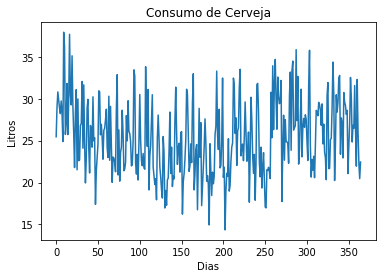

In [82]:
# Plotando consumo de cerveja por dia
plt.plot(dados.consumo_de_cerveja)
plt.xlabel('Dias')
plt.ylabel('Litros')
plt.title('Consumo de Cerveja')
plt.show()

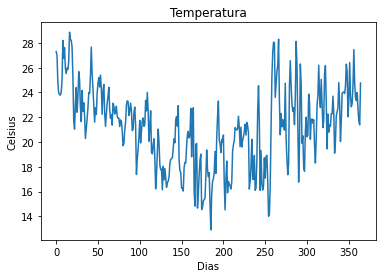

In [83]:
# Plotando a temperatura por dia
plt.plot(dados.temperatura_media)
plt.xlabel('Dias')
plt.ylabel('Celsius')
plt.title('Temperatura')
plt.show()

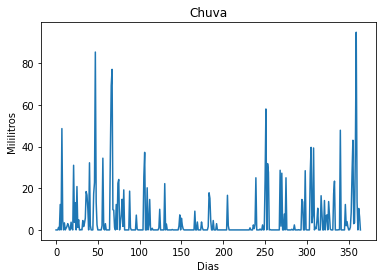

In [84]:
# Plotando a chuva por dia
plt.plot(dados.precipitacao)
plt.xlabel('Dias')
plt.ylabel('Mililitros')
plt.title('Chuva')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



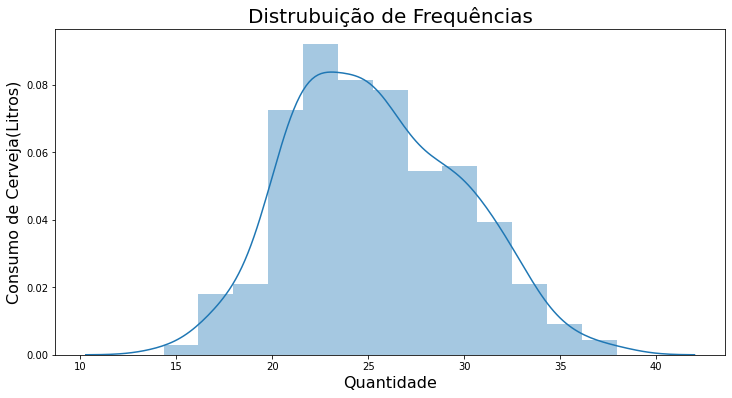

In [92]:
# Distribuição de probabilidade
ax = sns.distplot(dados.consumo_de_cerveja)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja(Litros)', fontsize=16)
ax.set_xlabel('Quantidade', fontsize=16)

ax

In [90]:
# Plotando amostragem do consumo diário em relação aos dias da semana
dow1=sum(dados.consumo_de_cerveja[dados.final_de_semana==0])/(365-96)
weekend2=sum(dados.consumo_de_cerveja[dados.final_de_semana==1])/(365-269)
days=["Dias da semana","Finais de semana"]
fig=go.Figure([go.Bar(x=days,y=[dow1,weekend2])])
fig.update_layout(title='Amostra de Consumo Diário de Cerveja',
                   xaxis_title='Dias',
                   yaxis_title='Consumo de cerveja (Litros)')
fig.show()

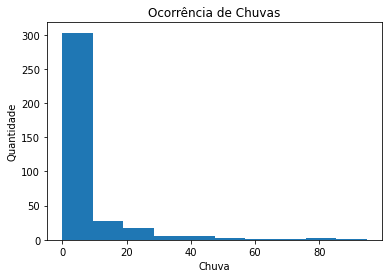

In [99]:
# Plotando ocorrência de chuvas
plt.hist(dados.precipitacao)
plt.xlabel('Chuva')
plt.ylabel('Quantidade')
plt.title('Ocorrência de Chuvas')
plt.show()

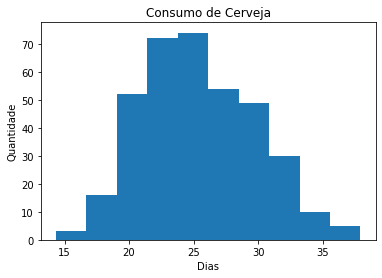

In [102]:
# Plotando consumo de cerveja
plt.hist(dados.consumo_de_cerveja)
plt.xlabel('Dias')
plt.ylabel('Quantidade')
plt.title('Consumo de Cerveja')
plt.show()

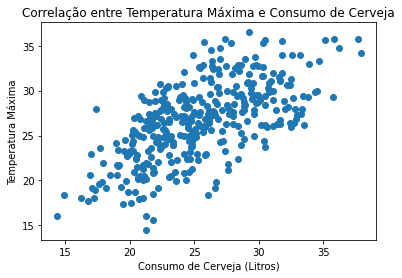

In [105]:
# Plotando correlação entre temperatura máxima e consumo de cerveja
plt.scatter(dados.consumo_de_cerveja,dados.temperatura_maxima)
plt.xlabel('Consumo de Cerveja (Litros)')
plt.ylabel('Temperatura Máxima')
plt.title('Correlação entre Temperatura Máxima e Consumo de Cerveja')
plt.show()

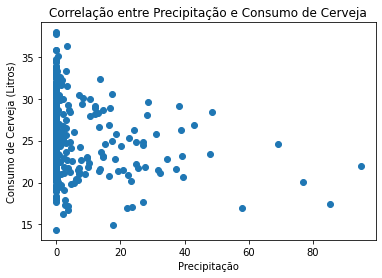

In [108]:
# Plotando correlação entre precipitação e consumo de cerveja
plt.scatter(dados.precipitacao,dados.consumo_de_cerveja)
plt.xlabel('Precipitação')
plt.ylabel('Consumo de Cerveja (Litros)')
plt.title('Correlação entre Precipitação e Consumo de Cerveja')
plt.show()

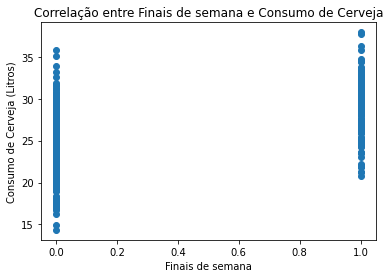

In [109]:
# Plotando correlação entre finais de semana e consumo de cerveja
plt.scatter(dados.final_de_semana,dados.consumo_de_cerveja)
plt.xlabel('Finais de semana')
plt.ylabel('Consumo de Cerveja (Litros)')
plt.title('Correlação entre Finais de semana e Consumo de Cerveja')
plt.show()

In [110]:
# Correlação dos dados com o atributo contagem
corr = dados.corr()

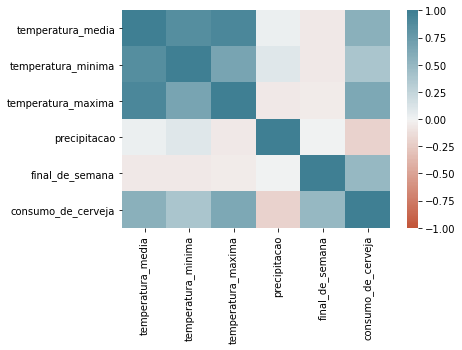

In [111]:
# Plotando coeficientes de correlação em um mapa de calor
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

## 5. Re-escala dos dados

In [112]:
dados = (dados - dados.min())/(dados.max()-dados.min())
dados.head()

,temperatura_media,temperatura_minima,temperatura_maxima,precipitacao,final_de_semana,consumo_de_cerveja
0,0.902256,0.956835,0.818182,0.000000,0.0,0.471221
1,0.884712,1.000000,0.863636,0.000000,0.0,0.620031
2,0.746867,0.848921,0.700000,0.000000,1.0,0.698101
3,0.694236,0.784173,0.640909,0.012658,1.0,0.655082
4,0.684211,0.748201,0.627273,0.000000,0.0,0.616979


## 6. Organização dos dados para modelagem

In [113]:
# Divisão dos dados em atributos descritores e atributo de classe
x = dados.drop(columns=['consumo_de_cerveja'])
x.head()

,temperatura_media,temperatura_minima,temperatura_maxima,precipitacao,final_de_semana
0,0.902256,0.956835,0.818182,0.000000,0.0
1,0.884712,1.000000,0.863636,0.000000,0.0
2,0.746867,0.848921,0.700000,0.000000,1.0
3,0.694236,0.784173,0.640909,0.012658,1.0
4,0.684211,0.748201,0.627273,0.000000,0.0


In [114]:
y = dados.consumo_de_cerveja
y.head()

0    0.471221
1    0.620031
2    0.698101
3    0.655082
4    0.616979
Name: consumo_de_cerveja, dtype: float64

In [119]:
# Dividindo os dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.33, random_state=150)

## 7. Treinando os modelos e fazendo previsão


In [123]:
# Definindo modelo de regressão linear
linear = LinearRegression()
linear.fit(x_treino,y_treino)
pred_linear = linear.predict(x_teste)

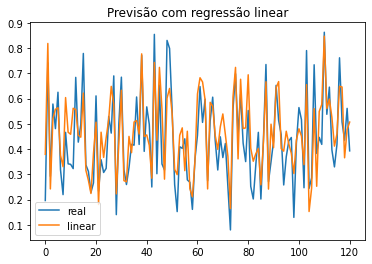

In [124]:
# Plotando resultados da MLP
plt.plot(y_teste.reset_index(drop=True),label='real')
plt.plot(pred_linear,label='linear')
plt.legend()
plt.title('Previsão com regressão linear')
plt.show()

In [125]:
# Definindo modelo de árvore de decisão
arvore = DecisionTreeRegressor()
arvore.fit(x_treino,y_treino)
pred_arvore = arvore.predict(x_teste)

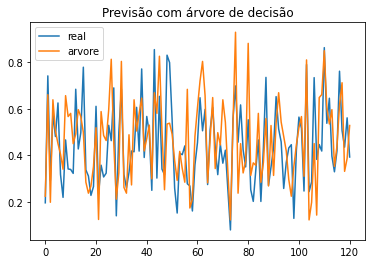

In [126]:
# Plotando resultados da árvore de decisão
plt.plot(y_teste.reset_index(drop=True),label='real')
plt.plot(pred_arvore,label='arvore')
plt.legend()
plt.title('Previsão com árvore de decisão')
plt.show()

In [127]:
# Definindo modelo de random forest
floresta = RandomForestRegressor(n_estimators=100)
floresta.fit(x_treino,y_treino)
pred_floresta = floresta.predict(x_teste)

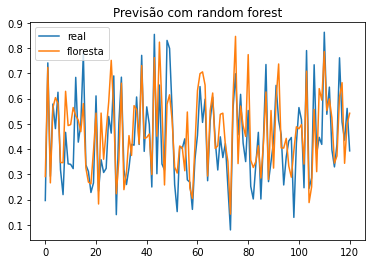

In [128]:
# Plotando resultados da random forest
plt.plot(y_teste.reset_index(drop=True),label='real')
plt.plot(pred_floresta,label='floresta')
plt.legend()
plt.title('Previsão com random forest')
plt.show()

In [131]:
# Defindo modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(200,50),activation='logistic',max_iter=10000)
mlp.fit(x_treino,y_treino)
pred_mlp = mlp.predict(x_teste)

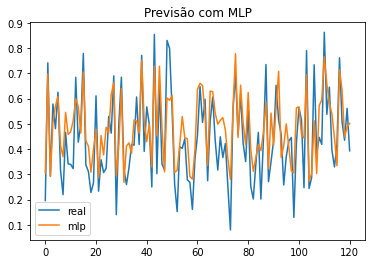

In [132]:
# Plotando resultados da MLP
plt.plot(y_teste.reset_index(drop=True),label='real')
plt.plot(pred_mlp,label='mlp')
plt.legend()
plt.title('Previsão com MLP')
plt.show()

## 8. Avaliando Modelos

### Mean Absolute Error (MAE)

In [133]:
from sklearn.metrics import mean_absolute_error

In [135]:
# MAE Árvore
mean_absolute_error(y_teste,pred_linear)

0.08465924682463366

In [136]:
# MAE Árvore
mean_absolute_error(y_teste,pred_arvore)

0.12674499820307306

In [137]:
# MAE Random Forest
mean_absolute_error(y_teste,pred_floresta)

0.0956203922951882

In [139]:
# MAE MLP
mean_absolute_error(y_teste,pred_mlp)

0.09432855631382679

### Mean Squared Error (MSE)

In [140]:
from sklearn.metrics import mean_squared_error

In [141]:
mean_squared_error(y_teste,pred_linear)

0.01009500073789175

In [142]:
mean_squared_error(y_teste,pred_arvore)

0.02323660029610322

In [143]:
mean_squared_error(y_teste,pred_floresta)

0.013676785075081067

In [144]:
mean_squared_error(y_teste,pred_mlp)

0.012119719856885793

### Root Mean Squared Error (RMSE)

In [145]:
mean_squared_error(y_teste,pred_linear)**(1/2)

0.10047388087404482

In [147]:
mean_squared_error(y_teste,pred_arvore)**(1/2)

0.15243556112699957

In [149]:
mean_squared_error(y_teste,pred_floresta)**(1/2)

0.1169477878161065

In [150]:
mean_squared_error(y_teste,pred_mlp)**(1/2)

0.11008959922211449

### Mean Absolute Percentage Error (MAPE)

In [151]:
def mean_absolute_percentage_error(y_teste,y_pred):
  y_teste=y_teste.values
  erro = 0
  for i in range(len(y_teste)):
    erro += abs(y_teste[i]-y_pred[i])/y_teste[i]
  return erro/len(y_teste)

In [152]:
mean_absolute_percentage_error(y_teste,pred_linear)

0.2389750296218508

In [153]:
mean_absolute_percentage_error(y_teste,pred_arvore)

0.32735665654760376

In [154]:
mean_absolute_percentage_error(y_teste,pred_floresta)

0.2620053147324901

In [155]:
mean_absolute_percentage_error(y_teste,pred_mlp)

0.28306109577825295

## 9. Conclusão

* Nos finais de semana o consumo de cerveja é mais elevado
* Quando a temperatura máxima é alta o consumo de cerveja também é alto
* Podemos dizer que o povo em São Paulo bebe cerveja para se refrescar
* O mapa de calor mostra uma boa correlação nos dados de temperatura e consumo
* Os dados de temperatura são inter-correlacionados